## Import Libraries

In [1]:
#Import Libraries
import numpy as np
from random import sample
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
import math

## Import the Reward and Transition Matrix from the xls file

In [2]:
#Import the reward table and the transition matrix
r_table = pd.read_excel('environment_matrices.xlsx', sheet_name ='rewards', index_col=0)
state_value_function = pd.read_excel('environment_matrices.xlsx', sheet_name ='State value function')
transition_matrix = pd.read_excel('environment_matrices.xlsx', sheet_name ='transition',index_col=0)
transition_matrix = pd.read_excel('environment_matrices.xlsx', sheet_name ='transition',index_col=0)

## Initialize important parameters and Q matrix

In [3]:
#Initialize parameters
total_episodes = 10000 #Total episodes
number_of_steps = 100 #Maximum steps per episode
epsilon = 1 #Highest exploration probability
epsilon_min = 0.1 # Lowest exploration probability 
decay_rate = 0.996 #Exponential decay rate for exploration probability

#Q Learning parameters
alpha = 0.15 #Learning rate
gamma = 0.999 #Discount rate

#Initialization of the Q matrix
q_table = pd.DataFrame(np.matrix(np.zeros([16,4])).astype("float32"), columns = transition_matrix.columns, index = transition_matrix.index)
q_table.head()

,UP,DOWN,RIGHT,LEFT
A,0.0,0.0,0.0,0.0
B,0.0,0.0,0.0,0.0
C,0.0,0.0,0.0,0.0
D,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0


In [4]:
# Define the optimal state value table
optimal_state_value_function = np.array(state_value_function)
optimal_state_value_function

array([[-6, -5, -4, -5],
       [-5,  0, -3,  0],
       [-4, -3, -2,  0],
       [ 0, -2, -1,  0]])

## Epsilon-Greedy-Decay Policy

In [5]:
# ε-greedy_decay policy function

def e_greedy_decay_policy(state, epsilon):
    exploration_threshold = np.random.uniform(0,1)
    actions_list = ["UP", "DOWN", "RIGHT", "LEFT"]
    #With probability 1-ε choose the action with the highest q-value
    #e-decay policy implementation
    if (exploration_threshold >= epsilon):
        # Exploit: Then we choose the best action from the Q table
        action = q_table.loc[state, :].argmax()
        #print('Max Q row value', action)  
    else:
        # Explore: We take a random action from the action list
        action = sample(actions_list, 1)[0]
    return action


## 'execute_action' Function

In [6]:
# Execution of the action selected from policy.
def execute_action(state, action):
    next_state = transition_matrix.loc[state,action] #return the next state
    reward = r_table.loc[state, next_state]
    end_episode_states = ['F', 'H', 'L', 'M', 'P']
    done = False #done is a flag to determine if my algorithm is going to terminate or not
    if (next_state in end_episode_states):
        done = True
    print('Current state', state)
    print('Next state', next_state)
    print ('Done', done)
    
    
    return next_state, reward, done

## 'update_Q' Function

In [7]:
#Update Q

def update_Q(current_state, next_state, action, reward, alpha, gamma):
    q_old = q_table.loc[current_state, action] #OLD Q value
    q_new = q_old + alpha * (reward + gamma * max(q_table.loc[next_state,:] - q_old))
    #q_new_values.append(q_new) # # add the new q value to a list with all the q new values
    q_table.loc[current_state, action] = q_new
    
    print('Old Q value:       ', q_old)
    print('Updated Q value (Q new): ', q_new)

## Train the agent

In [8]:
#Training the agent
sum_reward = 0
episodes_rewards_list_per_10 = []


#Main
episodes_rewards_list = []
window = 100
# initialize average rewards
average_reward = deque(maxlen=total_episodes)
# initialize best average reward as negative infinity
best_average_reward = -math.inf
# initialize monitor for most recent rewards
check_rewards = deque(maxlen=window)

#EPISODES
for episode in range(1, total_episodes + 1):
    current_state = 'A'
    episode_reward = 0
    # Decide the value of epsilon before the start of the episode
    for step in range (number_of_steps):
        #Choose action depending on the value of epsilon
        action = e_greedy_decay_policy(current_state, epsilon)
        
        #Execute Action and calculate the next state, the reward and check if the episode is finished
        next_state, reward, done = execute_action(current_state, action)
        
        # Update the Q Matrix based on the new values
        update_Q(current_state, next_state, action, reward, alpha, gamma)
        current_state = next_state
        
        episode_reward += reward 
        
        if done:
            check_rewards.append(episode_reward)
            break

    if episode >= 100:
        average_reward = np.mean(check_rewards)
        if average_reward > best_average_reward:
            best_average_reward = average_reward
    print("\rEpisode {}/{} || Best average reward {}".format(episode, total_episodes, best_average_reward), end="")

    if best_average_reward > 83:
        print('\nThe environment is solved in {} episodes.'.format(episode-1), end = "")
        break
    
    #Reassure that the minimum epsilon value is going to be 0.1 and update the value of epsilon
    epsilon = max(epsilon_min, epsilon*decay_rate)
    episodes_rewards_list.append(episode_reward)
    print("\rEpsilon for this episode is: {}".format(epsilon))
    print("\rThe reward for this episode is: {}".format(episode_reward))
    
    episode_reward = 0


Current state A
Next state A
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state A
Next state B
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state B
Next state B
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state B
Next state B
Done False
Old Q value:        -0.15
Updated Q value (Q new):  -0.27752250506728887
Current state B
Next state A
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state A
Next state A
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state A
Next state E
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state E
Next state I
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state I
Next state I
Done False
Old Q value:        0.0
Updated Q value (Q new):  -0.15
Current state I
Next state I
Done False
Old Q value:        -0.15
Updated Q value (Q new):  -0.27752250506728887
Curren

/Users/kgkolias/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  # Remove the CWD from sys.path while we load stuff.


E
Next state F
Done True
Old Q value:        -55.645947
Updated Q value (Q new):  -62.30740141925812
Epsilon for this episode is: 0.9192763915429975
The reward for this episode is: -105.0
Current state A
Next state E
Done False
Old Q value:        -0.98534757
Updated Q value (Q new):  -1.055125733989477
Current state E
Next state A
Done False
Old Q value:        -0.81290483
Updated Q value (Q new):  -0.9992016334056855
Current state A
Next state A
Done False
Old Q value:        -1.5161592
Updated Q value (Q new):  -1.5970733123242855
Current state A
Next state E
Done False
Old Q value:        -1.0551257
Updated Q value (Q new):  -1.1144476323485375
Current state E
Next state E
Done False
Old Q value:        -0.45000002
Updated Q value (Q new):  -0.6000000178813935
Current state E
Next state E
Done False
Old Q value:        -0.6
Updated Q value (Q new):  -0.743475474318862
Current state E
Next state A
Done False
Old Q value:        -0.99920166
Updated Q value (Q new):  -1.16647125924229

Old Q value:        -0.7162615
Updated Q value (Q new):  -0.816762192068994
Current state C
Next state G
Done False
Old Q value:        -0.38593575
Updated Q value (Q new):  -0.47810328090935944
Current state G
Next state K
Done False
Old Q value:        -0.2775225
Updated Q value (Q new):  -0.3859357570558786
Current state K
Next state L
Done True
Old Q value:        -27.75225
Updated Q value (Q new):  -38.59357590827942
Epsilon for this episode is: 0.8796275632082743
The reward for this episode is: -108.0
Current state A
Next state E
Done False
Old Q value:        -1.666429
Updated Q value (Q new):  -1.7017797631710767
Current state E
Next state I
Done False
Old Q value:        -0.9013354
Updated Q value (Q new):  -1.0018782219082116
Current state I
Next state J
Done False
Old Q value:        -0.578937
Updated Q value (Q new):  -0.6753966053023934
Current state J
Next state I
Done False
Old Q value:        -0.22164378
Updated Q value (Q new):  -0.4240383720174432
Current state I
Next

Next state A
Done False
Old Q value:        -2.66288
Updated Q value (Q new):  -2.7182388427019117
Current state A
Next state E
Done False
Old Q value:        -2.0313077
Updated Q value (Q new):  -2.080796110188961
Current state E
Next state I
Done False
Old Q value:        -1.3605597
Updated Q value (Q new):  -1.4147652431190014
Current state I
Next state J
Done False
Old Q value:        -0.9079321
Updated Q value (Q new):  -0.9634652243673801
Current state J
Next state N
Done False
Old Q value:        -0.38593575
Updated Q value (Q new):  0.33068387992382053
Current state N
Next state J
Done False
Old Q value:        -0.15
Updated Q value (Q new):  -0.22796952459961176
Current state J
Next state N
Done False
Old Q value:        0.3306839
Updated Q value (Q new):  0.9399180896997451
Current state N
Next state N
Done False
Old Q value:        -0.15
Updated Q value (Q new):  0.5312646646976471
Current state N
Next state N
Done False
Old Q value:        0.53126466
Updated Q value (Q new)

Old Q value:        -47.810326
Updated Q value (Q new):  -55.645948328018186
Epsilon for this episode is: 0.7768520581884801
The reward for this episode is: -107.0
Current state A
Next state B
Done False
Old Q value:        -2.387335
Updated Q value (Q new):  -2.4035192789793016
Current state B
Next state B
Done False
Old Q value:        -1.7980309
Updated Q value (Q new):  -1.902522305905819
Current state B
Next state C
Done False
Old Q value:        -1.4943368
Updated Q value (Q new):  -1.5460760231733321
Current state C
Next state G
Done False
Old Q value:        -0.838609
Updated Q value (Q new):  -0.9006837467700243
Current state G
Next state C
Done False
Old Q value:        -0.251854
Updated Q value (Q new):  -0.4899866848498583
Current state C
Next state G
Done False
Old Q value:        -0.90068376
Updated Q value (Q new):  -0.9873600756287575
Current state G
Next state H
Done True
Old Q value:        -27.75225
Updated Q value (Q new):  -38.59357590827942
Epsilon for this episod

Current state I
Next state E
Done False
Old Q value:        -1.2279559
Updated Q value (Q new):  -0.8830794192075729
Current state E
Next state I
Done False
Old Q value:        2.0745234
Updated Q value (Q new):  2.5271553869962693
Current state I
Next state M
Done True
Old Q value:        -55.645947
Updated Q value (Q new):  -62.30740141925812
Epsilon for this episode is: 0.7374111842078607
The reward for this episode is: -104.0
Current state A
Next state A
Done False
Old Q value:        -3.1446292
Updated Q value (Q new):  -2.9130316111087797
Current state A
Next state E
Done False
Old Q value:        -0.59809864
Updated Q value (Q new):  -0.27977930066585543
Current state E
Next state I
Done False
Old Q value:        2.5271554
Updated Q value (Q new):  2.9119604396104815
Current state I
Next state J
Done False
Old Q value:        6.0960913
Updated Q value (Q new):  6.917477901172638
Current state J
Next state N
Done False
Old Q value:        12.578485
Updated Q value (Q new):  14.22

Done True
Old Q value:        -76.878365
Updated Q value (Q new):  -80.35814163322449
Epsilon for this episode is: 0.6999727282217079
The reward for this episode is: -102.0
Current state A
Next state E
Done False
Old Q value:        2.8064296
Updated Q value (Q new):  3.215745153987408
Current state E
Next state A
Done False
Old Q value:        -2.2152746
Updated Q value (Q new):  -1.5514362578868868
Current state A
Next state E
Done False
Old Q value:        3.2157452
Updated Q value (Q new):  3.563724799501896
Current state E
Next state F
Done True
Old Q value:        -97.28602
Updated Q value (Q new):  -97.70770851860047
Epsilon for this episode is: 0.6971728373088211
The reward for this episode is: -103.0
Current state A
Next state E
Done False
Old Q value:        3.5637248
Updated Q value (Q new):  3.859559610188007
Current state E
Next state F
Done True
Old Q value:        -97.70771
Updated Q value (Q new):  -98.0662098827362
Epsilon for this episode is: 0.6943841459595858
The re

Old Q value:        7.27209
Updated Q value (Q new):  9.308666575574875
Current state I
Next state M
Done True
Old Q value:        -87.96965
Updated Q value (Q new):  -89.78739817581177
Epsilon for this episode is: 0.6486472030472881
The reward for this episode is: -103.0
Current state A
Next state B
Done False
Old Q value:        -2.6650813
Updated Q value (Q new):  -2.6951788152992724
Current state B
Next state C
Done False
Old Q value:        -1.8649315
Updated Q value (Q new):  -1.8705502176344395
Current state C
Next state G
Done False
Old Q value:        -0.9014263
Updated Q value (Q new):  -0.8356264439344406
Current state G
Next state K
Done False
Old Q value:        0.53867966
Updated Q value (Q new):  3.9736515847206118
Current state K
Next state G
Done False
Old Q value:        -0.15
Updated Q value (Q new):  0.3179291719913482
Current state G
Next state K
Done False
Old Q value:        3.9736516
Updated Q value (Q new):  6.893892904376983
Current state K
Next state J
Done F

Updated Q value (Q new):  59.180983013534544
Current state N
Next state N
Done False
Old Q value:        22.46546
Updated Q value (Q new):  30.365811295318604
Current state N
Next state O
Done False
Old Q value:        76.188194
Updated Q value (Q new):  78.81413717193604
Current state O
Next state P
Done True
Old Q value:        94.713005
Updated Q value (Q new):  95.52026125679016
Epsilon for this episode is: 0.6083562365039253
The reward for this episode is: 92.0
Current state A
Next state A
Done False
Old Q value:        10.435177
Updated Q value (Q new):  12.683044944953918
Current state A
Next state B
Done False
Old Q value:        -2.7440772
Updated Q value (Q new):  -2.4054837848424913
Current state B
Next state A
Done False
Old Q value:        0.5164729
Updated Q value (Q new):  4.250658628082276
Current state A
Next state B
Done False
Old Q value:        -2.4054837
Updated Q value (Q new):  -1.558060808801651
Current state B
Next state A
Done False
Old Q value:        4.25065

Updated Q value (Q new):  42.207653361701965
Current state I
Next state I
Done False
Old Q value:        13.31178
Updated Q value (Q new):  19.268561330604552
Current state I
Next state M
Done True
Old Q value:        -94.713005
Updated Q value (Q new):  -95.52026125679016
Epsilon for this episode is: 0.5774699159923643
The reward for this episode is: -104.0
Current state A
Next state E
Done False
Old Q value:        35.32782
Updated Q value (Q new):  36.208762832450866
Current state E
Next state I
Done False
Old Q value:        42.207653
Updated Q value (Q new):  43.834387677955625
Current state I
Next state J
Done False
Old Q value:        54.064407
Updated Q value (Q new):  56.61145926017761
Current state J
Next state K
Done False
Old Q value:        18.864445
Updated Q value (Q new):  25.276373511695862
Current state K
Next state O
Done False
Old Q value:        62.654427
Updated Q value (Q new):  67.81088200416565
Current state O
Next state N
Done False
Old Q value:        23.0688

Current state I
Next state J
Done False
Old Q value:        72.47086
Updated Q value (Q new):  74.12576287384033
Current state J
Next state F
Done True
Old Q value:        -80.35814
Updated Q value (Q new):  -83.31647190322876
Epsilon for this episode is: 0.5351269138785045
The reward for this episode is: -105.0
Current state A
Next state E
Done False
Old Q value:        53.40195
Updated Q value (Q new):  54.36055239048004
Current state E
Next state I
Done False
Old Q value:        60.800026
Updated Q value (Q new):  62.646887629318236
Current state I
Next state I
Done False
Old Q value:        19.26856
Updated Q value (Q new):  27.338911922836303
Current state I
Next state J
Done False
Old Q value:        74.12576
Updated Q value (Q new):  75.53267576637268
Current state J
Next state F
Done True
Old Q value:        -83.316475
Updated Q value (Q new):  -85.83150114860534
Epsilon for this episode is: 0.5329864062229905
The reward for this episode is: -104.0
Current state A
Next state E


Old Q value:        15.876569
Updated Q value (Q new):  18.313722093200685
Current state B
Next state A
Done False
Old Q value:        33.14152
Updated Q value (Q new):  38.99460983715058
Current state A
Next state B
Done False
Old Q value:        18.313723
Updated Q value (Q new):  21.262753560733795
Current state B
Next state A
Done False
Old Q value:        38.99461
Updated Q value (Q new):  43.97061292247772
Current state A
Next state E
Done False
Old Q value:        73.20217
Updated Q value (Q new):  73.91340068016052
Current state E
Next state I
Done False
Old Q value:        78.94945
Updated Q value (Q new):  79.76971586380004
Current state I
Next state J
Done False
Old Q value:        85.42438
Updated Q value (Q new):  86.31570186538697
Current state J
Next state N
Done False
Old Q value:        92.37349
Updated Q value (Q new):  92.93098277740478
Current state N
Next state O
Done False
Old Q value:        97.09483
Updated Q value (Q new):  97.35823905830384
Current state O
Nex

Current state J
Next state N
Done False
Old Q value:        94.366844
Updated Q value (Q new):  94.75297704811096
Current state N
Next state O
Done False
Old Q value:        97.94464
Updated Q value (Q new):  98.0983436832428
Current state O
Next state P
Done True
Old Q value:        99.97135
Updated Q value (Q new):  99.99064458274842
Epsilon for this episode is: 0.47450079763039377
The reward for this episode is: 93.0
Current state A
Next state A
Done False
Old Q value:        50.291405
Updated Q value (Q new):  55.08631067276001
Current state A
Next state A
Done False
Old Q value:        55.08631
Updated Q value (Q new):  59.16270053253174
Current state A
Next state B
Done False
Old Q value:        43.845383
Updated Q value (Q new):  46.98412671089172
Current state B
Next state A
Done False
Old Q value:        65.79229
Updated Q value (Q new):  68.26438806381226
Current state A
Next state E
Done False
Old Q value:        83.29044
Updated Q value (Q new):  83.87501961708068
Current s

Current state I
Next state I
Done False
Old Q value:        41.410427
Updated Q value (Q new):  49.23572266139984
Current state I
Next state M
Done True
Old Q value:        -98.06621
Updated Q value (Q new):  -98.37098663406373
Epsilon for this episode is: 0.4450270009774366
The reward for this episode is: -106.0
Current state A
Next state E
Done False
Old Q value:        90.50292
Updated Q value (Q new):  90.72489125404358
Current state E
Next state I
Done False
Old Q value:        92.9852
Updated Q value (Q new):  93.08201497611999
Current state I
Next state J
Done False
Old Q value:        94.632286
Updated Q value (Q new):  94.82685006790162
Current state J
Next state N
Done False
Old Q value:        96.93168
Updated Q value (Q new):  97.07098878173828
Current state N
Next state O
Done False
Old Q value:        98.86234
Updated Q value (Q new):  98.89401675262451
Current state O
Next state K
Done False
Old Q value:        50.50365
Updated Q value (Q new):  56.502508736610416
Curren

Old Q value:        100.09195
Updated Q value (Q new):  100.09317083587646
Epsilon for this episode is: 0.4224329257239659
The reward for this episode is: 90.0
Current state A
Next state E
Done False
Old Q value:        92.73893
Updated Q value (Q new):  92.87244226264954
Current state E
Next state I
Done False
Old Q value:        94.630905
Updated Q value (Q new):  94.72913079833984
Current state I
Next state J
Done False
Old Q value:        96.2874
Updated Q value (Q new):  96.33449813842773
Current state J
Next state N
Done False
Old Q value:        97.60271
Updated Q value (Q new):  97.65727699089051
Current state N
Next state N
Done False
Old Q value:        70.52647
Updated Q value (Q new):  74.6384110961914
Current state N
Next state O
Done False
Old Q value:        98.96787
Updated Q value (Q new):  98.98649845695496
Current state O
Next state P
Done True
Old Q value:        100.09317
Updated Q value (Q new):  100.09420861663818
Epsilon for this episode is: 0.42074319402107
The

Old Q value:        95.528076
Updated Q value (Q new):  95.56016052207947
Current state I
Next state J
Done False
Old Q value:        96.74319
Updated Q value (Q new):  96.77133732681274
Current state J
Next state N
Done False
Old Q value:        97.932045
Updated Q value (Q new):  97.9526635307312
Current state N
Next state O
Done False
Old Q value:        99.07064
Updated Q value (Q new):  99.0746634803772
Current state O
Next state P
Done True
Old Q value:        100.09849
Updated Q value (Q new):  100.09872944908142
Epsilon for this episode is: 0.40098595443371154
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        94.21205
Updated Q value (Q new):  94.26406513328553
Current state E
Next state I
Done False
Old Q value:        95.56016
Updated Q value (Q new):  95.59165334472657
Current state I
Next state J
Done False
Old Q value:        96.77134
Updated Q value (Q new):  96.79836139030456
Current state J
Next state N
Done False
Old Q val

Done False
Old Q value:        94.739624
Updated Q value (Q new):  94.76231531028748
Current state E
Next state I
Done False
Old Q value:        95.89205
Updated Q value (Q new):  95.9082469532013
Current state I
Next state J
Done False
Old Q value:        97.00113
Updated Q value (Q new):  97.01059286384583
Current state J
Next state N
Done False
Old Q value:        98.065285
Updated Q value (Q new):  98.06960146446228
Current state N
Next state O
Done False
Old Q value:        99.09509
Updated Q value (Q new):  99.09564588127137
Current state O
Next state N
Done False
Old Q value:        86.65665
Updated Q value (Q new):  88.37063018341064
Current state N
Next state O
Done False
Old Q value:        99.09564
Updated Q value (Q new):  99.09611288261414
Current state O
Next state P
Done True
Old Q value:        100.099785
Updated Q value (Q new):  100.09983209114074
Epsilon for this episode is: 0.37607856009277074
The reward for this episode is: 93.0
Current state A
Next state A
Done Fa

Old Q value:        97.33926
Updated Q value (Q new):  97.60295121688843
Current state O
Next state K
Done False
Old Q value:        75.43336
Updated Q value (Q new):  78.60547087135315
Current state K
Next state O
Done False
Old Q value:        97.60295
Updated Q value (Q new):  97.82713131980896
Current state O
Next state P
Done True
Old Q value:        100.09998
Updated Q value (Q new):  100.10000073051452
Epsilon for this episode is: 0.35698500561340163
The reward for this episode is: 91.0
Current state A
Next state E
Done False
Old Q value:        94.97568
Updated Q value (Q new):  94.98490797767639
Current state E
Next state I
Done False
Old Q value:        96.03828
Updated Q value (Q new):  96.04412995567321
Current state I
Next state J
Done False
Old Q value:        97.07834
Updated Q value (Q new):  97.08057918968201
Current state J
Next state N
Done False
Old Q value:        98.09429
Updated Q value (Q new):  98.0947396144867
Current state N
Next state J
Done False
Old Q valu

Next state I
Done False
Old Q value:        96.08157
Updated Q value (Q new):  96.0831303806305
Current state I
Next state M
Done True
Old Q value:        -99.19686
Updated Q value (Q new):  -99.33221160621643
Epsilon for this episode is: 0.33481074686368306
The reward for this episode is: -107.0
Current state A
Next state E
Done False
Old Q value:        95.06663
Updated Q value (Q new):  95.06895038414001
Current state E
Next state I
Done False
Old Q value:        96.08313
Updated Q value (Q new):  96.08445355110169
Current state I
Next state I
Done False
Old Q value:        86.57414
Updated Q value (Q new):  88.00038789024353
Current state I
Next state J
Done False
Old Q value:        97.092964
Updated Q value (Q new):  97.09344068145752
Current state J
Next state N
Done False
Old Q value:        98.097145
Updated Q value (Q new):  98.09726031799316
Current state N
Next state O
Done False
Old Q value:        99.098915
Updated Q value (Q new):  99.09893887634277
Current state O
Next 

Current state J
Next state N
Done False
Old Q value:        98.09787
Updated Q value (Q new):  98.09789707908631
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state K
Done False
Old Q value:        88.94364
Updated Q value (Q new):  90.2307860721588
Current state K
Next state O
Done False
Old Q value:        98.534195
Updated Q value (Q new):  98.6188420375824
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.3127577951872501
The reward for this episode is: 92.0
Current state A
Next state E
Done False
Old Q value:        95.088066
Updated Q value (Q new):  95.08867179908752
Current state E
Next state I
Done False
Old Q value:        96.09311
Updated Q value (Q new):  96.09340043106079
Current state I
Next state J
Done False
Old Q value:        97.096054
Updated Q value (Q new):  97.0961807472229
Current s

Old Q value:        96.095314
Updated Q value (Q new):  96.09540754127502
Current state I
Next state J
Done False
Old Q value:        97.09694
Updated Q value (Q new):  97.09695143051148
Current state J
Next state N
Done False
Old Q value:        98.09802
Updated Q value (Q new):  98.09802680168151
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state K
Done False
Old Q value:        92.31573
Updated Q value (Q new):  93.14462025527953
Current state K
Next state O
Done False
Old Q value:        98.84821
Updated Q value (Q new):  98.88580465240479
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.2968790436844203
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09307
Updated Q value (Q new):  95.09327082290649
Current state E
Next state F
Done True
Old Q val

Old Q value:        94.467674
Updated Q value (Q new):  94.98859118309021
Current state K
Next state L
Done True
Old Q value:        -83.316475
Updated Q value (Q new):  -85.83150114860534
Epsilon for this episode is: 0.2795565155735364
The reward for this episode is: -107.0
Current state A
Next state E
Done False
Old Q value:        95.09467
Updated Q value (Q new):  95.09471179542541
Current state E
Next state I
Done False
Old Q value:        96.09593
Updated Q value (Q new):  96.09594320716857
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state J
Done False
Old Q value:        90.26995
Updated Q value (Q new):  91.29298853836059
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q 

Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state N
Done False
Old Q value:        95.8412
Updated Q value (Q new):  96.17939070167542
Current state N
Next state J
Done False
Old Q value:        91.29299
Updated Q value (Q new):  92.16272665023804
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state J
Done False
Old Q value:        92.16273
Updated Q value (Q new):  92.90213247070312
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state K
Done False
Old Q value:        94.988594
Updated Q value (Q new):  9

Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state F
Done True
Old Q value:        -98.37099
Updated Q value (Q new):  -98.63009454574585
Epsilon for this episode is: 0.24492199410665388
The reward for this episode is: -103.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state A
Done False
Old Q value:        90.051704
Updated Q value (Q new):  90.65743671798705
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q 

Old Q value:        93.49753
Updated Q value (Q new):  93.88691010551453
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.23155732542095342
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q va

Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.21544013685214725
The reward for this episode is: 95.0
Current state A
Next state A
Done False
Old Q value:        93.26484
Updated Q value (Q new):  93.38908323898315
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next sta

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state J
Done False
Old Q value:        94.90572
Updated Q value (Q new):  95.23409070358277
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.2036842059030586
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q val

Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.19334313386471175
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current 

Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.17916624170251985
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q va

Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.17075296155067024
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.17006994970446757
The reward for this episode is: 95.0
Current state A
Next state A
Done False
Old Q value:        93.58451
Upd

Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state N
Done False
Old Q value:        97.24598
Updated Q value (Q new):  97.37366231613159
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1595059904036601
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q

Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.14899982257176056
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current 

Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.13974464219327035
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state I
Done False
Old Q value:        95.4932
Updated Q value (Q new):  95.58353246994018
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current s

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state O
Done False
Old Q value:        97.94968
Updated Q value (Q new):  98.12191369209289
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.13106435084726298
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q va

Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state J
Done False
Old Q value:        96.664856
Updated Q value (Q new):  96.72961710090637
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.12341690671072149
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q v

Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.11668241120565657
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state M
Done True
Old Q value:        -98.37099
Updated Q value (Q new):  -98.63009454574585
Epsilon for this episode is: 0.11621568156083395
The reward for this episode is: -104.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state A
Done False
Old Q value:        93.15622
Up

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1094346390669655
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state F
Done True
Old Q value:        -99.75909
Updated Q value (Q new):  -99.81018748054504
Epsilon for this episode is: 0.10899690051069764
The reward for this episode is: -103.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Upd

Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.10222651677794514
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated 

Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The r

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode i

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state M
Done True
Old Q value:        -99.332214
Updated Q value (Q new):  -99.44728203430176
Epsilon for this episode is: 0.1
The reward for this episode i

Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state O
Done False
Old Q value:        98.12191
Updated Q value (Q new):  98.26833807144165
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next sta

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.0

Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episo

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode i

Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state I
Done False
Old Q value:        95.86842
Updated Q value (Q new):  95.90252681770325
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for thi

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state I
Done False
Old Q value:        95.90253
Updated Q value (Q new):  95.93151981773376
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.1

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state K
Done False
Old Q value:        97.84308
Updated Q value (Q new):  97.88064034500123
Current state K
Next state G
Done False
Old Q value:        14.636766
Updated Q value (Q new):  20.062880294799804
Current state G
Next state K
Done False
Old Q value:        51.84807
Updated Q value (Q new):  58.777982273864744
Current state K
Next state O
Done False
Old Q value:        99.09474
Updated Q value (Q new):  99.09539096336364
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 91.0
Current state A
Next state E
Done False
Old Q value:        9

Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state B
Done False
Old Q value:        90.600006
Updated Q value (Q new):  90.8892530014038
Current state B
Next state A
Done False
Old Q value:        93.53125
Updated Q value (Q new):  93.61557240409851
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.0

Old Q value:        95.95617
Updated Q value (Q new):  95.97712379608154
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state E
Done False
Old Q value:        94.92273
Updated Q value (Q new):  94.94854189186096
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state E
Done False
Old Q value:        94.5

Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state A
Done False
Old Q value:        91.80434
Updated Q value (Q new):  92.14743693275452
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state F
Done True
Old Q value:        -100.00705
Updated Q value (Q new):  -100.02099318389892
Epsilon for this episode is: 0.1
The reward for this episode is: -104.0
Current state A
Next state E
Done False
Old Q value:        95

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.0

Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.094966

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state J
Done False
Old Q value:        96.95831
Updated Q value (Q new):  96.97909959602356
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.0

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state M
Done True
Old Q value:        -100.08882
Updated Q value (Q new):  -100.09051152267456
Epsilon for this episode is: 0.1
The reward for this episode is: -102.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.0949

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state J
Done False
Old Q value:        96.99677
Updated Q value (Q new):  97.01179617614746
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.0

Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state F
Done True
Old Q value:        -100.099495
Updated Q value (Q new):  -100.09958561820984
Epsilon for this episode is: 0.1
The reward for this episode

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state K
Done False
Old Q value:        97.9

Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.0

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state O
Done False
Old Q value:        98.90635
Updated Q value (Q new):  98.93522896118164
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.1

Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.0

Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False


Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state I
Done False
Old Q value:        96.015114
Updated Q value (Q new):  96.02723563461304
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 91.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.

Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.0

Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next sta

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state A
Done False
Old Q value:        94.06171
Updated Q value (Q new):  94.0665400341034
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state E
Done False
Old Q value:        95.029945
Updated Q value (Q new):  95.03969147338867
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.0

Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state F
Done True
Old Q value:        -100.058784
Updated Q value (Q new):  -100.06497562980651
Epsilon for this episode is: 0.1
The reward for this episode is: -103.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated 

Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state A
Done False
Old Q value:        94.07

Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state F
Done True
Old Q value:        -100.099785
Updated Q value (Q new):  -100.09983209114074
Epsilon for this episode is: 0.1
The reward for this episode is: -101.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        9

Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.094966

Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.0

Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09

Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09

Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state A
Done False
Old Q value:        94.07964
Updated Q value (Q new):  94.0817889251709
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next stat

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state A
Done False
Old Q value:        94.08179
Updated Q value (Q new):  94.08361152763366
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.1

Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state M
Done True
Old Q value:        -100.04293
Updated Q value (Q new):  -100.0514974521637
Epsilon for this episode is: 0.1
The reward for this episode is: -104.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next s

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.1

Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next sta

Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next sta

Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.0

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode i

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state N
Done False
Old Q value:        98.00391
Updated Q value (Q new):  98.01801390495301
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 92.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.0

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.1

Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.0

Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.094966

Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.0

Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state A
Done False
Old Q value:        94.043495
Updated Q value (Q new):  94.0510576423645
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):

Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state K
Done False
Old Q value:        98.07536
Updated Q value (Q new):  98.07875842323303
Current state K
Next state O
Done False
Old Q value:        99.09902
Updated Q value (Q new):  99.09902968215943
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 93.0
Current state A
Next sta

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state N
Done False
Old Q value:        98.067825
Updated Q value (Q new):  98.0723547000885
Current state N
Next state O
Done False
Old Q value:        99.0

Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next sta

Old Q value:        96.070045
Updated Q value (Q new):  96.07393576889038
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 92.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.

Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state A
Done False
Old Q value:        94.088554
Updated Q value (Q new):  94.08936472473144
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.

Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The r

Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state A
Done False
Old Q value:        94.09005
Updated Q value (Q new):  94.09063600616454
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value: 

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.1

Old Q value:        -92.646545
Updated Q value (Q new):  -93.76346058044433
Epsilon for this episode is: 0.1
The reward for this episode is: -104.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.0949

Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state N
Done False
Old Q value:        98.09249
Updated Q value (Q new):  98.09332435760498
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.0

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 92.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.1

Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state I
Done False
Old Q value:        96.086205
Updated Q value (Q new):  96.08767339172363
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next st

Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09

Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next sta

Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next sta

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.1

Updated Q value (Q new):  -100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: -101.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Nex

Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episo

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode i

Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state I
Done False
Old Q value:        96.09317
Updated Q value (Q new):  96.09359522819518
Current state I
Next state E
Done False
Old Q value:        95.07577
Updated Q value (Q new):  95.07864716873169
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next sta

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode i

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state I
Done False
Old Q value:        96.09166
Updated Q value (Q new):  96.09231097450257
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.0

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode i

Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):

Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next sta

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.0

Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state B
Done False
Old Q value:        93.04452
Updated Q value (Q new):  93.05101560173034
Current state B
Next state A
Done False
Old Q value:        94.08888
Updated Q value (Q new):  94.08964362831115
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state F
Done True
Old Q value:        -100.100075
Updated Q value (Q new):  -100.10007856407165
Epsilon for this episode is: 0.1
The

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state I
Done False
Old Q value:        96.09452
Updated Q value (Q new):  96.09474327316285
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.0

Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next sta

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.0

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state N
Done False
Old Q value:        98.0958
Updated Q value (Q new):  98.09613933792114
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09

Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 92.0
Current state A
Next state B
Done False
Old Q value:        93.06579
Updated Q value (Q new):  93.06946248970031
Current state B
Next state A
Done False
Old Q value:        94.09131
Updated Q value (Q new):  94.09170621757508
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state E
Done False
Old Q value:        95.08881
Updated Q value (Q new):  95.08973845062256
Current state E
Next state I
Done False
Old Q value: 

Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next sta

Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next sta

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.1

Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episo

Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next sta

Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.08416
Updated Q value (Q new):  98.08624150390625
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The r

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 91.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state I
Done False
Old Q value:        96.09493
Updated Q value (Q new):  96.09509352416993
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.0

Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next sta

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.0

Old Q value:        -100.098206
Updated Q value (Q new):  -100.09848946228027
Epsilon for this episode is: 0.1
The reward for this episode is: -103.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09

Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.0

Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.0

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 92.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state F
Done True
Old Q value:        -100.100075
Updated Q value (Q new):  -100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: -101.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.097

Old Q value:        96.09544
Updated Q value (Q new):  96.0955280948639
Current state I
Next state E
Done False
Old Q value:        95.093
Updated Q value (Q new):  95.0932993358612
Current state E
Next state F
Done True
Old Q value:        -100.100075
Updated Q value (Q new):  -100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: -105.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state E
Done False
Old Q value:        95.09463
Updated Q value (Q new):  95.09468088150024
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.0

Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state A
Done False
Old Q value:        94.09372
Updated Q value (Q new):  94.09375583457947
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state A
Done False
Old Q value:        94.09322
Updated Q value (Q new):  94.09333423614503
Current state A
Next state B
Done False
Old Q value:        93.08823
Updated Q value (Q new):  93.08885716819763
Current state B
Next state A
Done False
Old Q value:        94.09344
Updated Q value (Q new):  94.09351584777832
Current state A
Next sta

Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state F
Done True
Old Q value:        -100.100075
Updated Q value (Q new):  -100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: -101.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state F
Done True
Old Q value:        -100.100075
Updated Q value (Q new):  -100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: -101.0
Current state A
Next stat

Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next sta

Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next sta

Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state E
Done False
Old Q value:        95.0941
Updated Q value (Q new):  95.09423333854676
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next stat

Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value: 

Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state M
Done True
Old Q value:        -100.100044
Updated Q value (Q new):  -100.10005261955261
Epsilon for this episode is: 0.1
The reward for this episode is: -102.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        9

Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new): 

Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09

Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state I
Done False
Old Q value:        96.09576
Updated Q value (Q new):  96.09579402618408
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode 

Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state I
Done False
Old Q value:        96.095795
Updated Q value (Q new):  96.09582645683288
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 91.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode i

Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state A
Done False
Old Q value:        94.093506
Updated Q value (Q new):  94.09357422294617
Current state A
Next state E
Done False
Old Q value:        95.

Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state M
Done True
Old Q value:        -100.100075
Updated Q value (Q new):  -100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: -102.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        9

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode i

Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new): 

Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state K
Done False
Old Q value:        98.09751
Updated Q value (Q new):  98.09759223098754
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.0

Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 94.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state N
Done False
Old Q value:        98.09744
Updated Q value (Q new):  98.0975338558197
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episod

Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1ge reward 82.7
The reward for this episode is: 93.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q valu

Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state K
Done False
Old Q value:        98.09683
Updated Q value (Q new):  98.09701496543885
Current state K
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09

Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Epsilon for this episode is: 0.1
The reward for this episode is: 95.0
Current state A
Next state E
Done False
Old Q value:        95.09496
Updated Q value (Q new):  95.09496627120971
Current state E
Next state I
Done False
Old Q value:        96.095985
Updated Q value (Q new):  96.0959886100769
Current state I
Next state J
Done False
Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.0

Old Q value:        97.09701
Updated Q value (Q new):  97.09701094894409
Current state J
Next state N
Done False
Old Q value:        98.09803
Updated Q value (Q new):  98.09803328781128
Current state N
Next state O
Done False
Old Q value:        99.09905
Updated Q value (Q new):  99.09905562667846
Current state O
Next state P
Done True
Old Q value:        100.100075
Updated Q value (Q new):  100.10007856407165
Episode 2466/10000 || Best average reward 84.58
The environment is solved in 2465 episodes.

# Calculate Average Rewards per 100 Episodes

In [9]:
sum_rewards = 0
avg_rewards_per_100 = []

for i in range (1, len(episodes_rewards_list)+1):
    sum_rewards += episodes_rewards_list[i-1] 
    if (i%100) == 0 :
        avg_rewards_per_100.append(sum_rewards/100)
        sum_rewards=0
    if (i==len(episodes_rewards_list)):
        if (i%100==0):
            break
        else:
            avg_rewards_per_100.append(sum_rewards/(i%100))
        
avg_rewards_per_100

[-84.4,
 -26.01,
 17.74,
 36.12,
 58.58,
 70.78,
 70.79,
 72.79,
 70.89,
 76.5,
 74.77,
 70.85,
 78.77,
 62.9,
 78.72,
 76.62,
 76.68,
 80.71,
 70.67,
 72.79,
 64.86,
 70.74,
 70.95,
 68.73,
 85.35384615384615]

In [10]:
df = pd.DataFrame()
df = df.fillna(0)
df['Avg_Reward'] = avg_rewards_per_100
df['Episodes'] = (df.index+1)*100
df

,Avg_Reward,Episodes
0,-84.400000,100
1,-26.010000,200
2,17.740000,300
3,36.120000,400
4,58.580000,500
5,70.780000,600
6,70.790000,700
7,72.790000,800
8,70.890000,900
9,76.500000,1000


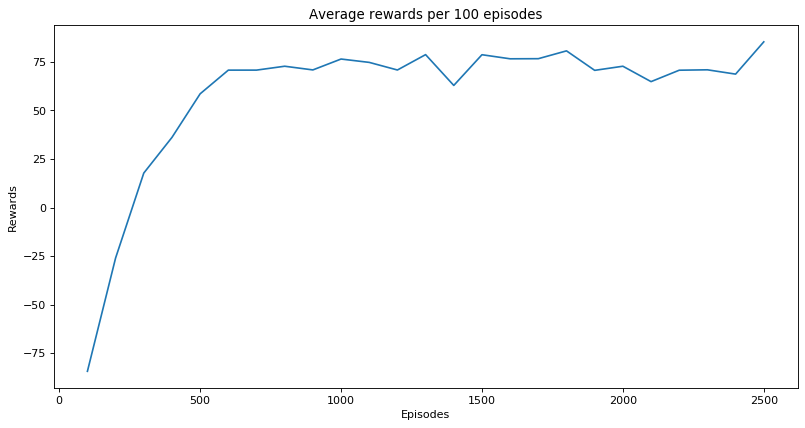

In [11]:
#Plot the average rewards per 100 episodes
plt.figure(figsize=(12,6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Average rewards per 100 episodes')
plt.plot(df['Episodes'], df['Avg_Reward'])

# Calculate Average Rewards per 50 Episodes

In [12]:
sum_rewards = 0
avg_rewards_per_50 = []

for i in range (1, len(episodes_rewards_list)+1):
    sum_rewards += episodes_rewards_list[i-1] 
    if (i%50) == 0 :
        avg_rewards_per_50.append(sum_rewards/50)
        sum_rewards=0
    if (i==len(episodes_rewards_list)):
        if (i%50==0):
            break
        else:
            avg_rewards_per_50.append(sum_rewards/(i%50))
        
avg_rewards_per_50

len(avg_rewards_per_50)

17

In [13]:
df_50 = pd.DataFrame()
df_50 = df_50.fillna(0)
df_50['Avg_Reward'] = avg_rewards_per_50
df_50['Episodes'] = (df_50.index+1)*50
df_50

,Avg_Reward,Episodes
0,-94.000000,50
1,-89.620000,100
2,-41.880000,150
3,-29.860000,200
4,6.180000,250
5,26.020000,300
6,34.360000,350
7,54.560000,400
8,50.660000,450
9,70.680000,500


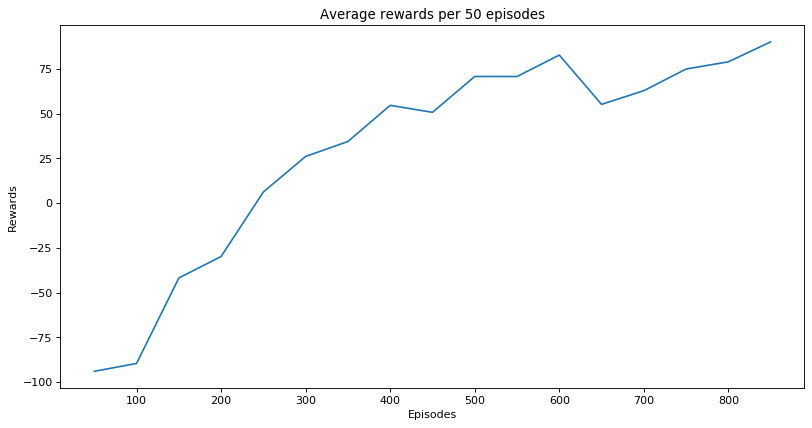

In [14]:
#Plot the average rewards per 50 episodes
plt.figure(figsize=(12,6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Average rewards per 50 episodes')
plt.plot(df_50['Episodes'], df_50['Avg_Reward'])

# Calculate Average Rewards per 10 Episodes

In [15]:
sum_rewards = 0
avg_rewards_per_10 = []

for i in range (1, len(episodes_rewards_list)+1):
    sum_rewards += episodes_rewards_list[i-1] 
    if (i%10) == 0 :
        avg_rewards_per_10.append(sum_rewards/10)
        sum_rewards=0
    if (i==len(episodes_rewards_list)):
        if (i%10==0):
            break
        else:
            avg_rewards_per_10.append(sum_rewards/(i%10))
        
avg_rewards_per_10

len(avg_rewards_per_10)

85

In [16]:
df_10 = pd.DataFrame()
df_10 = df_10.fillna(0)
df_10['Avg_Reward'] = avg_rewards_per_10
df_10['Episodes'] = (df_10.index+1)*10


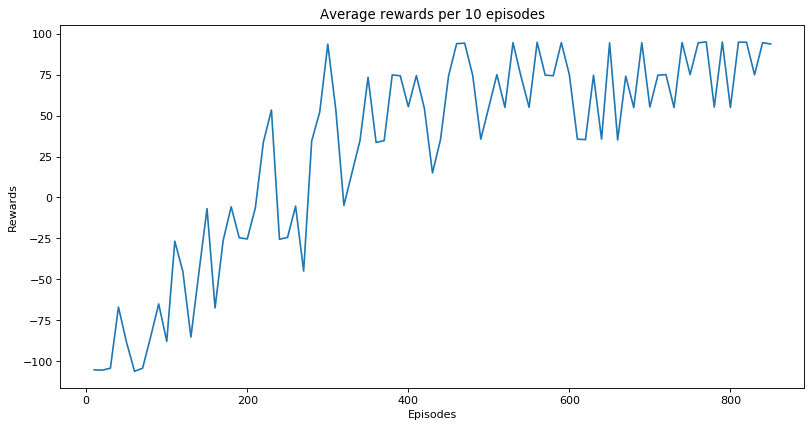

In [17]:
#Plot the average rewards per 10 episodes
plt.figure(figsize=(12,6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Average rewards per 10 episodes')
plt.plot(df_10['Episodes'], df_10['Avg_Reward'])

# Calculate Reward per episode

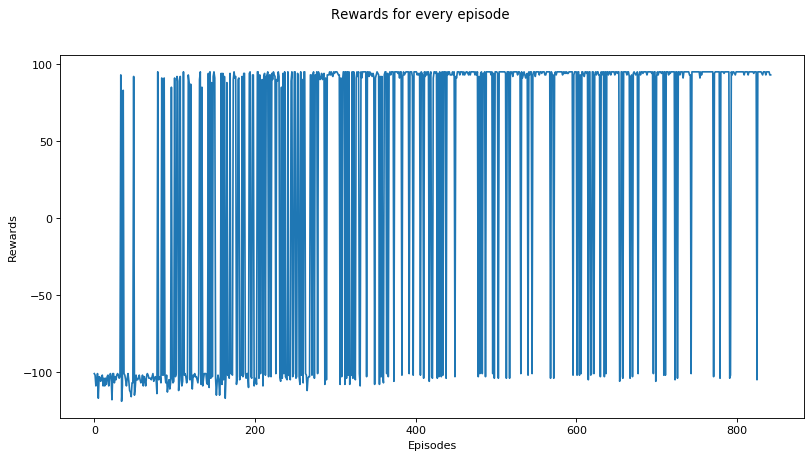

In [18]:
#%% Plot the reward for every episode
reward_per_episode = pd.DataFrame(np.asarray(episodes_rewards_list)) 
reward_per_episode['episodes'] = reward_per_episode.index
reward_per_episode.columns = ['total_reward', 'episodes']


plt.figure(figsize=(12, 6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.suptitle('Rewards for every episode')
plt.plot(reward_per_episode['episodes'], reward_per_episode['total_reward'])